In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
B = 200
N = 20
X = np.random.randn(N)

In [3]:
print("sample mean of X:", X.mean())

sample mean of X: 0.13888088058170267


In [4]:
individual_estimates = np.empty(B)

for b in range(B):
    sample = np.random.choice(X, size=N)
    individual_estimates[b] = sample.mean()

In [5]:
bmean = individual_estimates.mean()
bstd = individual_estimates.std()

lower = bmean + norm.ppf(0.025)*bstd
upper = bmean + norm.ppf(0.975)*bstd

print(lower, upper)

-0.28897881056708297 0.5408440315108274


In [11]:
lower2 = X.mean() + norm.ppf(0.025)*X.std() / np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std() / np.sqrt(N)
print(lower2, upper2)

-0.2485865455925616 0.5263483067559669


In [12]:
print(f"bootstrap mean of X:", bmean)

bootstrap mean of X: 0.1259326104718723


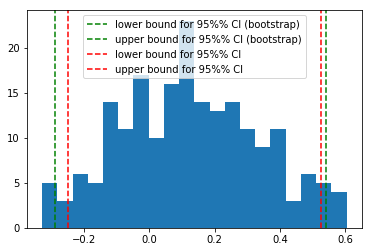

In [13]:
plt.hist(individual_estimates, bins=20)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95%% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95%% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95%% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95%% CI")
plt.legend()
plt.show()